# Scikit-Learn Estimators

In [2]:
from yellowbrick.datasets import load_concrete

In [19]:
ds = load_concrete(return_dataset=True)

In [23]:
print(ds.README)

# Concrete Compressive Strength

**Downloaded from the UCI Machine Learning Repository on October 13, 2016.**

- Multivariate Data Set
- Real Attributes
- 1,030 Instances
- 9 attributes
- Well suited for _regression_ tasks
- [https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

## Abstract

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

## Description

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

## Attributes

- cement (kg)
- blast furnace slag (kg)
- fly ash (kg)
- water (kg)
- superplasticizer (kg)
- coarse aggregate (kg)
- fine aggregate (kg)
- age (day)
- compressive strength (MPa)

## Citat

In [3]:
X, y  = load_concrete()

In [4]:
X.head()

,cement,slag,ash,water,splast,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [5]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: strength, dtype: float64

In [6]:
X.shape

(1030, 8)

In [7]:
y.shape

(1030,)

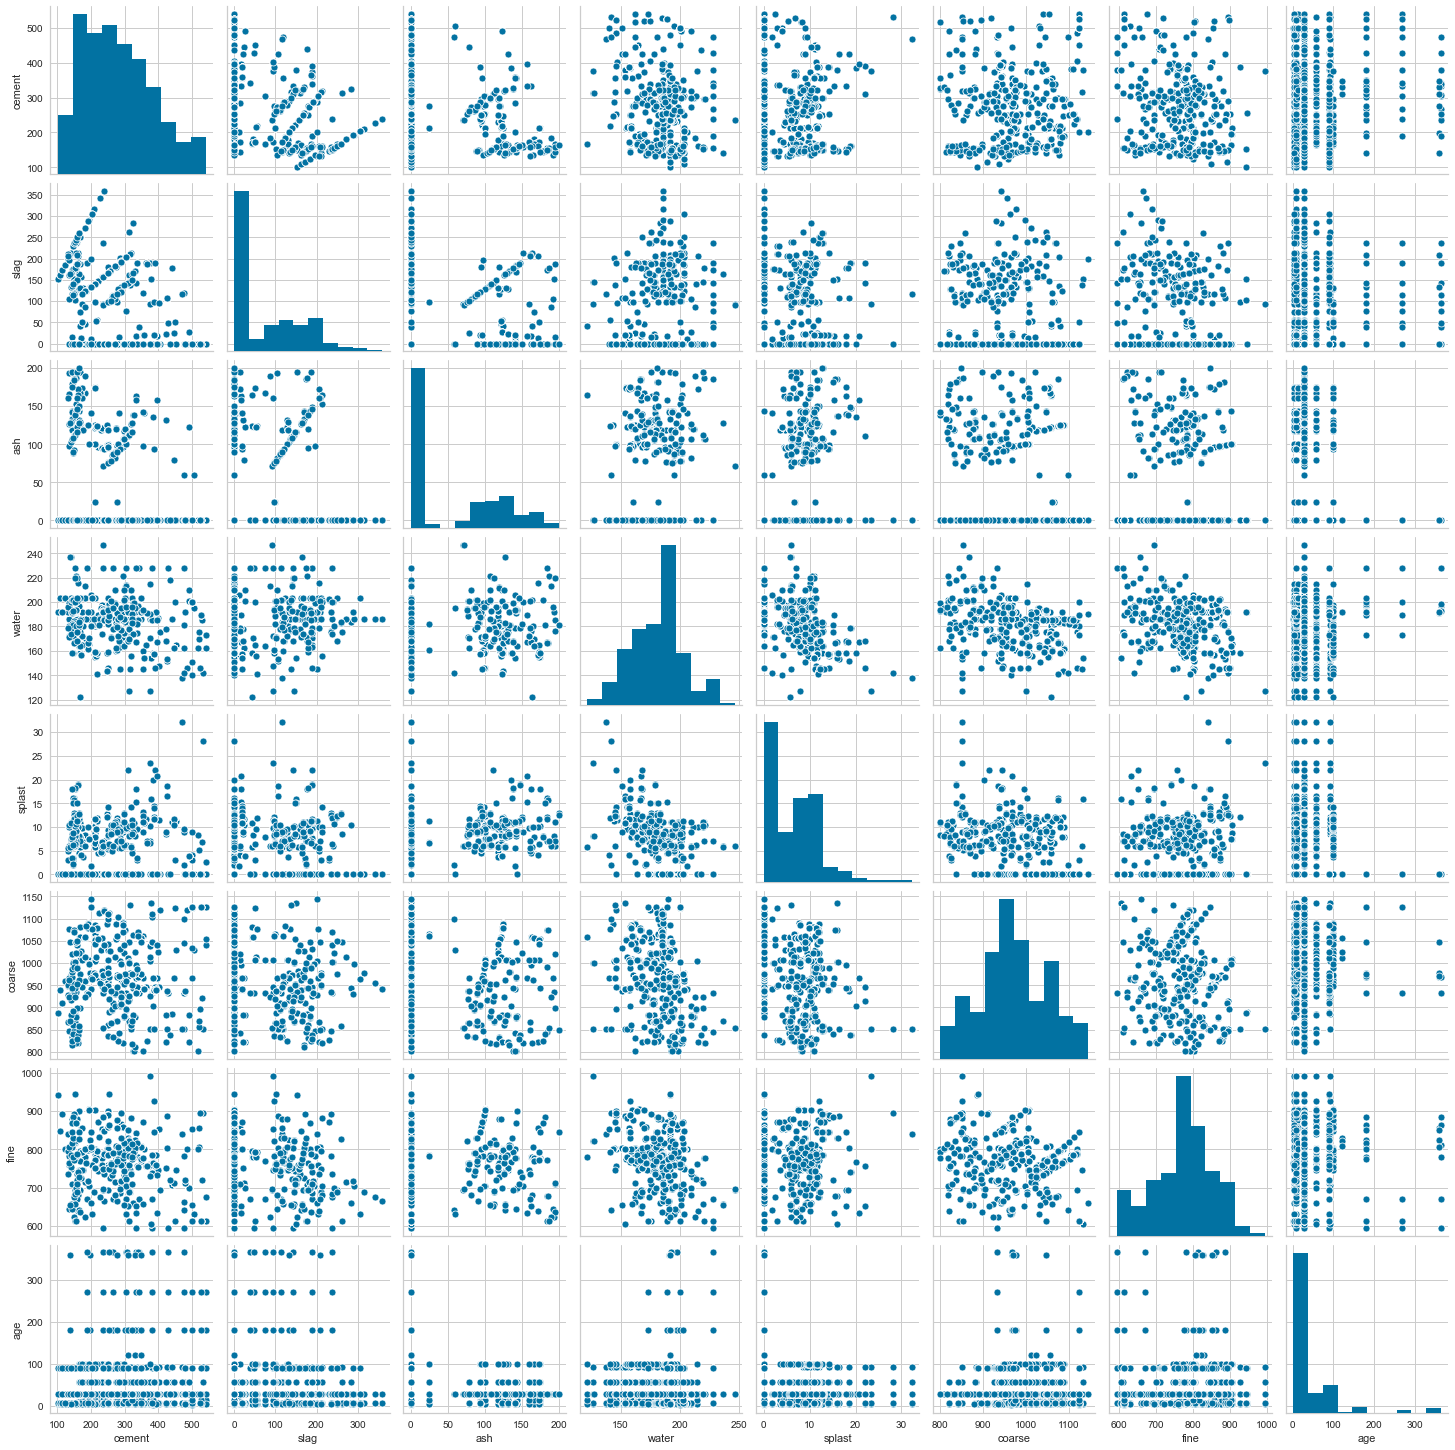

In [35]:
import seaborn as sns

sns.pairplot(X)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X,y)
model.score(X,y)

0.6151788809018788

In [17]:
model.predict([[150.3, 32, 0.0, 75, 0.25, 750.0, 342.1, 152]])

array([35.44284957])

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50)
model.fit(X, y)
model.score(X, y)

0.9867971964266592

In [26]:
model.predict([[150.3, 32, 0.0, 75, 0.25, 750.0, 342.1, 152]])

array([30.77491294])

In [27]:
for attr in dir(model):
    if attr.endswith("_") and not attr.startswith("_"):
        print(attr)

base_estimator_
estimators_
feature_importances_
n_features_
n_outputs_


In [34]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation="relu")
model.fit(X, y)
model.score(X, y)

0.8144209419327064

In [36]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [37]:
scale = StandardScaler().fit(X)
Xp = scale.transform(X)

In [40]:
import pandas as pd

pd.DataFrame(Xp).head()

,0,1,2,3,4,5,6,7
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487


In [41]:
for estimator in (
    LinearRegression(fit_intercept=False), 
    RandomForestRegressor(n_estimators=50), 
    MLPRegressor(hidden_layer_sizes=(100,100,100), activation="relu")):
    
    estimator.fit(Xp, y)
    print(estimator.score(Xp, y))

-3.985959331107572
0.985912178341884
0.9432591768714284


/Users/benjamin/.pyenv/versions/3.7.3/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
Xp = RobustScaler().fit_transform(X)

for estimator in (
    LinearRegression(fit_intercept=False), 
    RandomForestRegressor(n_estimators=50), 
    MLPRegressor(hidden_layer_sizes=(100,100,100), activation="relu")):
    
    estimator.fit(Xp, y)
    print(estimator.score(Xp, y))

0.4841158357390009
0.9867195498091974
0.937153915173451


/Users/benjamin/.pyenv/versions/3.7.3/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split as tts

models = [
    Pipeline([
         ("std", StandardScaler()),
         ("reg", LinearRegression(fit_intercept=False)),
    ]),
    Pipeline([
         ("std", StandardScaler()),
         ("reg", RandomForestRegressor(n_estimators=50)),
    ]),
    Pipeline([
         ("std", StandardScaler()),
         ("reg", MLPRegressor(hidden_layer_sizes=(100,100,100))),
    ]),
    Pipeline([
         ("std", RobustScaler()),
         ("reg", LinearRegression(fit_intercept=False)),
    ]),
    Pipeline([
         ("std", RobustScaler()),
         ("reg", RandomForestRegressor(n_estimators=50)),
    ]),
    Pipeline([
         ("std", RobustScaler()),
         ("reg", MLPRegressor(hidden_layer_sizes=(100,100,100))),
    ]),
]


X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(model, score)
    print("\n\n")

Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False) -3.9782920837521



Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       

/Users/benjamin/.pyenv/versions/3.7.3/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(100, 100, 100),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=200, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=None, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False) 0.8973772550091083



Pipeline(memory=None,
         steps=[('std',
      

/Users/benjamin/.pyenv/versions/3.7.3/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
